In [136]:
%matplotlib inline
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pyclust
import matplotlib

In [137]:
table = pd.read_csv('UserRetentionClustersweek.csv')

In [138]:
table.head()

,userid,dateaction,qns_score,ans_score,mintat,len_reply,actiondatenumber,actiondate1,actiondate2,actiondate3
0,81058,2015-10-26,0.615747,0.159717,25,332,1,2016-03-06,2016-03-06,NaN
1,151657,2015-10-26,0.564508,0.090480,31,176,1,2015-12-10,2015-12-10,2015-12-10
2,87057,2015-10-26,0.258919,0.305271,21,491,1,2015-11-13,2016-01-04,2016-01-04
3,186704,2015-10-26,0.443498,0.288749,85,494,1,2015-11-13,2015-12-19,2015-12-21
4,170276,2015-10-26,0.399200,0.923682,25,1390,1,2016-04-21,NaN,NaN


In [139]:
table['actiondate1'] = table['actiondate1'].fillna(0)

In [140]:
table['Labels'] = table['actiondate1'].map(lambda x : 1 if x !=0 else 0)

In [141]:
table.head()

,userid,dateaction,qns_score,ans_score,mintat,len_reply,actiondatenumber,actiondate1,actiondate2,actiondate3,Labels
0,81058,2015-10-26,0.615747,0.159717,25,332,1,2016-03-06,2016-03-06,NaN,1
1,151657,2015-10-26,0.564508,0.090480,31,176,1,2015-12-10,2015-12-10,2015-12-10,1
2,87057,2015-10-26,0.258919,0.305271,21,491,1,2015-11-13,2016-01-04,2016-01-04,1
3,186704,2015-10-26,0.443498,0.288749,85,494,1,2015-11-13,2015-12-19,2015-12-21,1
4,170276,2015-10-26,0.399200,0.923682,25,1390,1,2016-04-21,NaN,NaN,1


(0, 2000)

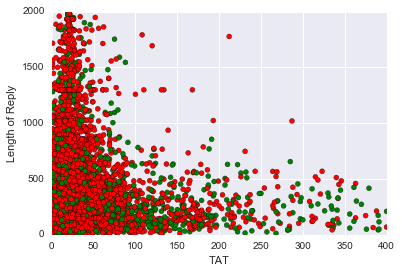

In [142]:
# stack1 = table[['mintat','Labels']]

ax = plt.subplot(111)
# plt.scatter(table["mintat"], table["len_reply"])




use_colors = ["red","green"]
ax.scatter(table["mintat"], table["len_reply"], c = table["Labels"],s=25,cmap=matplotlib.colors.ListedColormap(use_colors))
ax.set_xlabel("TAT")
ax.set_ylabel("Length of Reply")
plt.figure(figsize=(20, 10))
ax.set_xlim(0,400)
ax.set_ylim(0,2000)

In [143]:
table["Labels"].value_counts()

0    11239
1     5997
Name: Labels, dtype: int64

In [144]:
table.index[table["Labels"]==0]

Int64Index([    5,     6,    10,    11,    12,    13,    16,    17,    20,
               27,
            ...
            17222, 17223, 17225, 17226, 17227, 17228, 17229, 17230, 17231,
            17234],
           dtype='int64', length=11239)

In [145]:
zero_label_random_sample = table.ix[np.random.choice(table.index[table["Labels"]==0], replace=False, size=5978)]

In [146]:
subset_table = pd.concat([zero_label_random_sample, table[table["Labels"]==1]], axis=0)

In [147]:
subset_table = subset_table.ix[np.random.permutation(subset_table.index.values)]

(0, 1000)

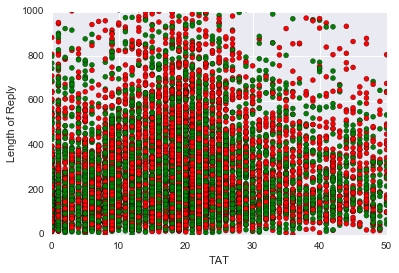

In [148]:
# stack1 = table[['mintat','Labels']]

ax = plt.subplot(111)
# plt.scatter(table["mintat"], table["len_reply"])




use_colors = ["red","green"]
ax.scatter(subset_table["mintat"], subset_table["len_reply"], c = subset_table["Labels"],s=25,cmap=matplotlib.colors.ListedColormap(use_colors))
ax.set_xlabel("TAT")
ax.set_ylabel("Length of Reply")
plt.figure(figsize=(20, 10))
ax.set_xlim(0,50)
ax.set_ylim(0,1000)

(0.1, 1)

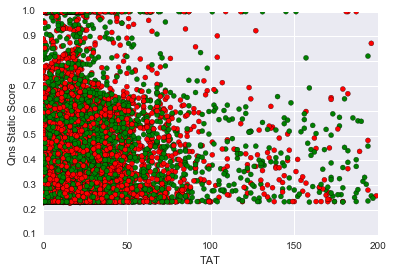

In [149]:
ax = plt.subplot(111)
use_colors = ["red","green"]
ax.scatter(subset_table["mintat"], subset_table["qns_score"], c = subset_table["Labels"],s=25,cmap=matplotlib.colors.ListedColormap(use_colors))
ax.set_xlabel("TAT")
ax.set_ylabel("Qns Static Score")
plt.figure(figsize=(20, 10))
ax.set_xlim(0,200)
ax.set_ylim(0.1,1)

In [150]:
table.head()

,userid,dateaction,qns_score,ans_score,mintat,len_reply,actiondatenumber,actiondate1,actiondate2,actiondate3,Labels
0,81058,2015-10-26,0.615747,0.159717,25,332,1,2016-03-06,2016-03-06,NaN,1
1,151657,2015-10-26,0.564508,0.090480,31,176,1,2015-12-10,2015-12-10,2015-12-10,1
2,87057,2015-10-26,0.258919,0.305271,21,491,1,2015-11-13,2016-01-04,2016-01-04,1
3,186704,2015-10-26,0.443498,0.288749,85,494,1,2015-11-13,2015-12-19,2015-12-21,1
4,170276,2015-10-26,0.399200,0.923682,25,1390,1,2016-04-21,NaN,NaN,1


In [151]:
table.groupby(table['dateaction'])

In [152]:
multiple = table[table['Labels']==1]
multiple.head()
# multiple.groupby(multiple['dateaction'], sort=True).sum()
grouped = multiple.groupby(multiple['dateaction'])
grouped['Labels'].agg([np.sum])
grouped['mintat'].agg([np.median])
grouped['len_reply'].agg([np.median])
# grouped.plot(x='dateaction', y='mintat')

,median
dateaction,
2015-10-26,332.0
2015-11-02,272.0
2015-11-09,248.0
2015-11-16,241.0
2015-11-23,203.0
2015-11-30,185.0
2015-12-07,177.0
2015-12-14,186.0
2015-12-21,174.5


In [153]:
tat_users_median.columns = ['date', 'Median TAT','FirsttimeUsers']
tat_users_median
users_len.columns = ['date', 'length of reply','FirsttimeUsers']
users_len

NameError: name 'tat_users_median' is not defined

In [154]:
tat_users_median = pd.merge(grouped['mintat'].agg([np.median]).reset_index(), grouped['Labels'].agg([np.sum]).reset_index())
users_len = pd.merge(grouped['len_reply'].agg([np.median]).reset_index(), grouped['Labels'].agg([np.sum]).reset_index())

KeyError: 'date'

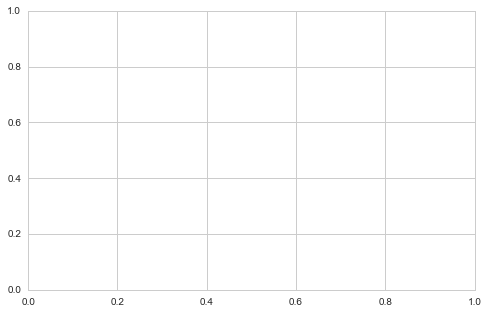

In [155]:

sns.set_style('whitegrid')
# tat_users_median.index = tat_users_median["dateaction"]
# tat_users_median.drop(["index"], axis=1, inplace=True)
plt.figure(figsize=(8,5))
ax = plt.gca()
tat_users_median.plot(x='date', secondary_y=['Median TAT'], ax=ax)
ax.set_ylim(0,1400)
ax.set_secondary_ylim(14,30)

In [156]:
tat_users_len.index = tat_users_len["date"]

NameError: name 'tat_users_len' is not defined

In [157]:

sns.set_style('whitegrid')
# plt.figure(figsize=(8,5))
# ax = plt.gca()
# ax2 = ax.twinx()
# ax2.set_ylim(0, 50)
# ax.plot(tat_users_len["date"].values, tat_users_len["FirsttimeUsers"].values)
# ax2.plot(tat_users_len["date"], tat_users_len["length of reply"])
tat_users_len["FirsttimeUsers"].plot(ylim=(0,400))
ax2 = 
tat_users_len["length of reply"].plot(secondary_y=True)
# axes[0].set_ylim(0,1400)
# axes[1].set_ylim(14,30)

SyntaxError: invalid syntax (<ipython-input-157-19be452ca73a>, line 10)

NameError: name 'tat_users_len' is not defined

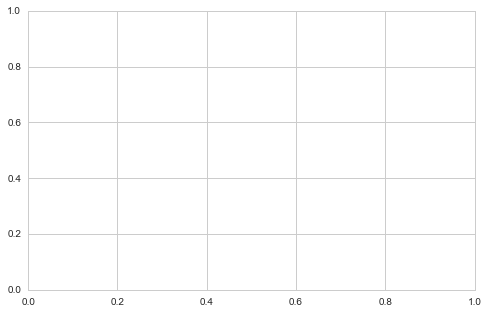

In [158]:
sns.set_style('whitegrid')
# tat_users_median.index = tat_users_median["dateaction"]
# tat_users_median.drop(["index"], axis=1, inplace=True)
plt.figure(figsize=(8,5))
ax = plt.gca()
tat_users_len.plot(x='date', secondary_y=['length of reply'], ax=ax)

In [159]:
once = table[table['Labels']==0]
once['Labels'] = once['Labels'].map(lambda x : 1 if x == 0 else 0)
once.head()
grouped1 = once.groupby(once['dateaction'])
grouped1['Labels'].agg([np.sum])
grouped1['mintat'].agg([np.median])
grouped1['len_reply'].agg([np.median])
non_return_tat_users_median = pd.merge(grouped1['mintat'].agg([np.median]).reset_index(), grouped1['Labels'].agg([np.sum]).reset_index())
non_return_users_len = pd.merge(grouped1['len_reply'].agg([np.median]).reset_index(), grouped1['Labels'].agg([np.sum]).reset_index())
non_return_tat_users_median.columns = ['date', 'Median TAT','FirsttimeUsers']
non_return_tat_users_median
non_return_users_len.columns = ['date', 'length of reply','FirsttimeUsers']

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


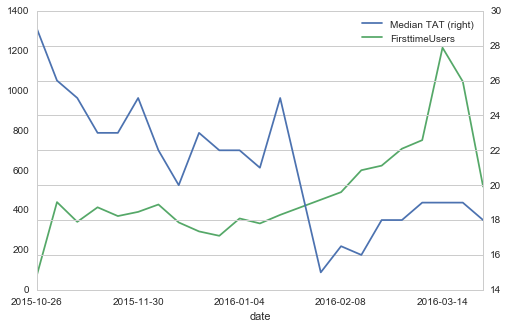

In [160]:
sns.set_style('whitegrid')
# tat_users_median.index = tat_users_median["dateaction"]
# tat_users_median.drop(["index"], axis=1, inplace=True)
plt.figure(figsize=(8,5))
ax = plt.gca()
non_return_tat_users_median.plot(x='date', secondary_y=['Median TAT'], ax=ax)

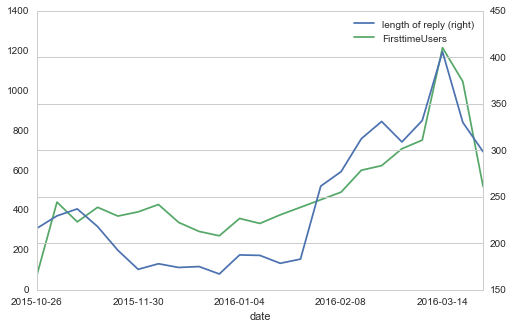

In [161]:
sns.set_style('whitegrid')
# tat_users_median.index = tat_users_median["dateaction"]
# tat_users_median.drop(["index"], axis=1, inplace=True)
plt.figure(figsize=(8,5))
ax = plt.gca()
non_return_users_len.plot(x='date', secondary_y=['length of reply'], ax=ax)

(0.1, 1)

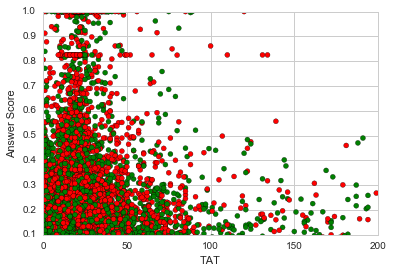

In [162]:
# stack1 = table[['mintat','Labels']]

ax = plt.subplot(111)
# plt.scatter(table["mintat"], table["len_reply"])
ax = plt.subplot(111)
use_colors = ["red","green"]
ax.scatter(subset_table["mintat"], subset_table["ans_score"], c = subset_table["Labels"],s=25,cmap=matplotlib.colors.ListedColormap(use_colors))
ax.set_xlabel("TAT")
ax.set_ylabel("Answer Score")
plt.figure(figsize=(20, 10))
ax.set_xlim(0,200)
ax.set_ylim(0.1,1)

In [163]:
table2 = pd.read_csv('Rating.csv')
table2.head()

,dateaction,userid,id,mintat,len_reply,rating,qns_score,ans_score,age,gender,problem_type,doctor_type
0,2015-11-02,290022,17396,1,502,NaN,0.252697,0.297404,25.0,M,Tooth and Mouth,Specialist
1,2015-11-02,290231,17411,22,155,NaN,0.545753,0.077105,29.0,M,I have some other problem,Alternative Therapist
2,2015-11-01,97647,17217,54,256,NaN,0.422644,0.148702,30.0,M,Eye and Vision,Specialist
3,2015-11-02,289744,17363,55,351,NaN,0.327001,0.210858,26.0,M,Urinary Problems,Specialist
4,2015-11-04,291576,17600,33,322,NaN,0.427183,0.176239,23.0,F,Sexual Health,Specialist


(0, 1)

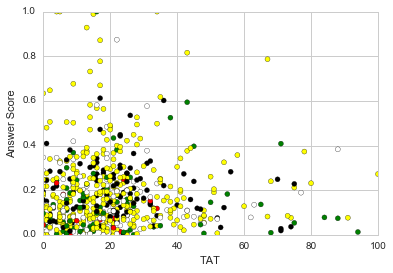

In [164]:
table3 = table2[table2['rating'] > 0]
ax = plt.subplot(111)
use_colors = ["red","green","blue","white","black","yellow"]
ax.scatter(table3["mintat"], table3["ans_score"], c = table3["rating"],s=25,cmap=matplotlib.colors.ListedColormap(use_colors))
ax.set_xlabel("TAT")
ax.set_ylabel("Answer Score")
plt.figure(figsize=(20, 10))
ax.set_xlim(0,100)
ax.set_ylim(0,1)

In [165]:
table2["rating"] = table2["rating"].fillna(0)
table3["rating"].unique()

array([ 5.,  4.,  3.,  1.,  2.])

In [167]:
edit = pd.read_csv('UserRetentionClustersedit.csv')
edit['actiondate1'] = edit['actiondate1'].fillna(0)
edit['Labels'] = edit['actiondate1'].map(lambda x : 1 if x !=0 else 0)
edit.head()
edit["problem_type"].value_counts()



Skin, Hair and Nails              3160
I have some other problem         2433
Sexual Health                     2043
Diet and Weight Problems          1570
Bone and Muscle                   1393
Urinary Problems                  1274
Stomach                            848
Ear, Nose, Throat                  826
Mental Health                      822
Brain and Spine                    591
Tooth and Mouth                    503
Child Health                       455
Eye and Vision                     369
Heart                              334
Diabetes and Hormonal Problems     231
Chest                              159
Cancer                             125
Kidney                              75
Animal Health                       25
Name: problem_type, dtype: int64

In [62]:
data = edit.groupby(['age','Labels']).size().reset_index()
data.head()


,age,Labels,0
0,0.0,0,12
1,0.0,1,8
2,1.0,0,191
3,1.0,1,94
4,2.0,0,57


In [83]:
# pivot
data2 = data.pivot(index='age', columns='Labels')
data2.head()

0      
Labels      0     1
age                
0.0      12.0   8.0
1.0     191.0  94.0
2.0      57.0  22.0
3.0      63.0  26.0
4.0      47.0  19.0

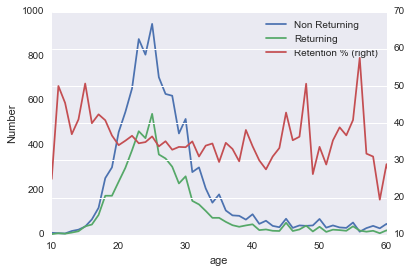

In [111]:
data2.columns = ['Non Returning','Returning','Retention %']
data2['Retention %'] = data2['Returning']*100/(data2['Non Returning']+data2['Returning'])
# ax = data2.plot(y = 'Retention')
# ax.set_xlim(0,100)
# data2.head()

ax = plt.gca()
data2.plot(secondary_y=['Retention %'], ax=ax)
ax.set_xlim(10,60)
ax.set_ylabel("Number")

0           
Labels           0          1
count    91.000000   86.00000
mean    123.362637   69.77907
std     216.301205  118.93591
min       1.000000    1.00000
25%      10.500000    7.00000
50%      33.000000   18.00000
75%      86.000000   52.25000
max     945.000000  542.00000

In [126]:
data3 = edit.groupby(['gender','Labels']).size().reset_index()
data3 = data3.pivot(index='gender', columns='Labels')
data3.columns = ['Non Returning','Returning']
data3['Retention %'] = data3['Returning']*100/(data3['Non Returning']+data3['Returning'])
data3.head()

# ax = plt.gca()
# data3.plot(secondary_y=['Retention %'], ax=ax)
# ax.set_xlim(10,60)
# ax.set_ylabel("Number")


,Non Returning,Returning,Retention %
gender,,,
F,4921,2236,31.242141
M,6304,3764,37.385777


In [134]:
data4 = edit.groupby(['problem_type','Labels']).size().reset_index()
data4 = data4.pivot(index='problem_type', columns='Labels')
data4.columns = ['Non Returning','Returning']
data4['Retention %'] = data4['Returning']*100/(data4['Non Returning']+data4['Returning'])
data4.sort_values(["Retention %"], ascending=False, inplace=True)
data4
# ax = plt.gca()
# data4.plot(secondary_y=['Retention %'], ax=ax, rot = 90)
# ax.set_ylabel("Number")


,Non Returning,Returning,Retention %
problem_type,,,
Tooth and Mouth,107,396,78.727634
Eye and Vision,174,195,52.845528
I have some other problem,1320,1113,45.745993
Bone and Muscle,818,575,41.277818
Cancer,74,51,40.800000
Animal Health,15,10,40.000000
Urinary Problems,804,470,36.891680
Chest,102,57,35.849057
Kidney,49,26,34.666667
